## Exploratory Data Analysis

In [9]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns

%matplotlib inline

In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/HamoyeHQ/01-University-Admissions/master/data/Admission_Predict_Ver1.1.csv")
dataset.head(10)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   
5           6        330          115                  5  4.5   3.0  9.34   
6           7        321          109                  3  3.0   4.0  8.20   
7           8        308          101                  2  3.0   4.0  7.90   
8           9        302          102                  1  2.0   1.5  8.00   
9          10        323          108                  3  3.5   3.0  8.60   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
5         1              0.90  
6         1              0.75  
7         0              0.68  
8         0              0.50  
9         0              0.45

In [4]:
# Let’s take a look at the last 10 rows
dataset.tail(10)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
490         491        307          105                  2  2.5   4.5  8.12   
491         492        297           99                  4  3.0   3.5  7.81   
492         493        298          101                  4  2.5   4.5  7.69   
493         494        300           95                  2  3.0   1.5  8.22   
494         495        301           99                  3  2.5   2.0  8.45   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
490         1              0.67  
491         0              0.54  
492         1              0.53  
493         1              0.62  
494         1              0.68  
495         1              0.87  
496         1              0.96  
497         1              0.93  
498         0              0.73  
499         0              0.84

In [18]:
dataset.rename(columns={'GRE Score':'Gre_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating',
                                       'LOR ':'LOR',  'Chance of Admit ':'Chance_of_Admit'}, inplace = True)

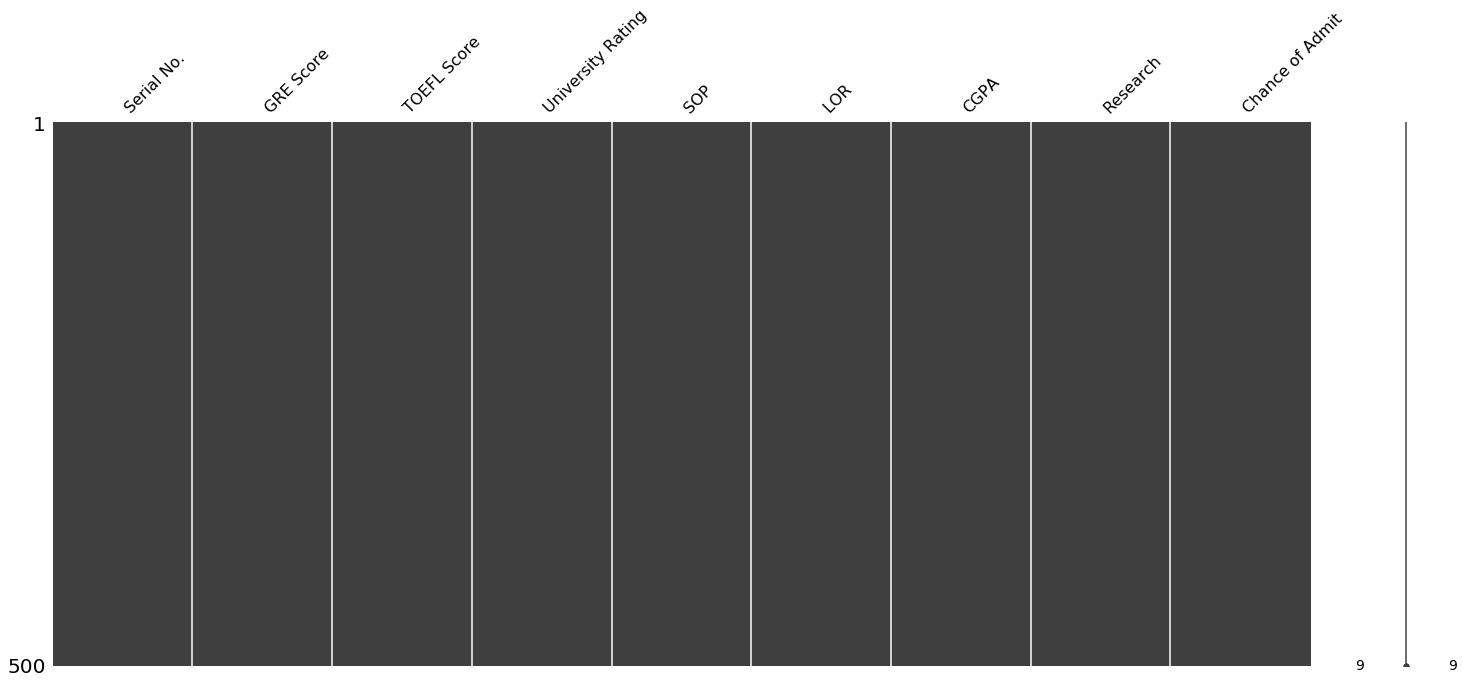

In [5]:
# A graphical view/representation of columns(features) with missing data using missingno
# Missingno library offers a very nice way to visualize the distribution of NaN values.
import missingno as msno
msno.matrix(dataset)
plt.show()

 `Serial No` column which for me is not relevant for this project

In [6]:
dataset = dataset.drop(['Serial No.'], axis=1)
dataset.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

### Check for General Correlation of Features

In [7]:
pearson_corr = dataset.corr(method='pearson')
pearson_corr

GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.827200           0.635376  0.613498   
TOEFL Score         0.827200     1.000000           0.649799  0.644410   
University Rating   0.635376     0.649799           1.000000  0.728024   
SOP                 0.613498     0.644410           0.728024  1.000000   
LOR                 0.524679     0.541563           0.608651  0.663707   
CGPA                0.825878     0.810574           0.705254  0.712154   
Research            0.563398     0.467012           0.427047  0.408116   
Chance of Admit     0.810351     0.792228           0.690132  0.684137   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.524679  0.825878  0.563398          0.810351  
TOEFL Score        0.541563  0.810574  0.467012          0.792228  
University Rating  0.608651  0.705254  0.427047          0.690132  
SOP                0.663707  0.712154  0.408116          0.684137  
LOR                1.000000  0.637469  0.372526          0.645365  
CGPA               0.637469  1.000000  0.501311          0.882413  
Research           0.372526  0.501311  1.000000          0.545871  
Chance of Admit    0.645365  0.882413  0.545871          1.000000

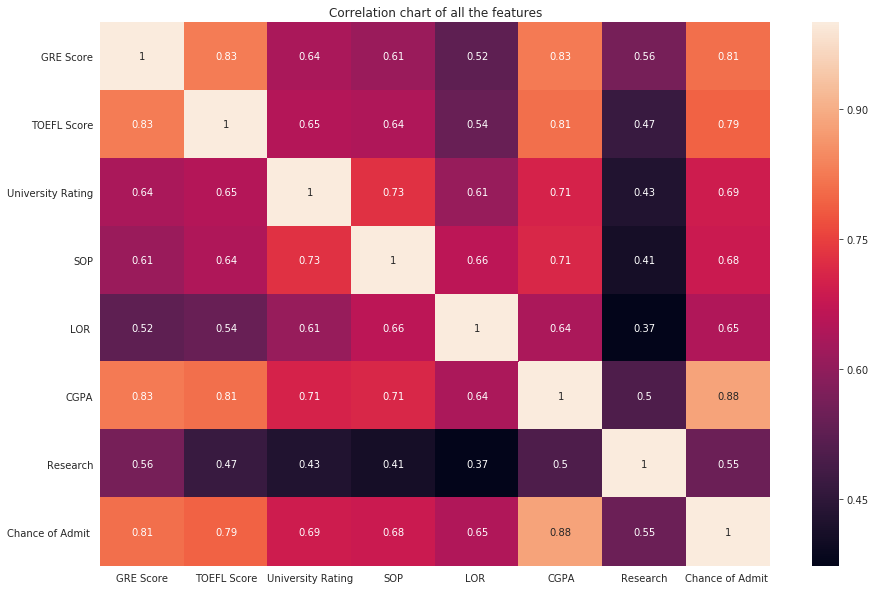

In [10]:
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(dataset.corr(), annot=True)
    plt.title('Correlation chart of all the features')

### Python Profiling
Generates profile reports from a pandas DataFrame. The pandas `df.describe()` function is great but a little basic for serious exploratory data analysis. `pandas_profiling` extends the pandas DataFrame with `df.profile_report()` for quick data analysis.

For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:

* **Type inference:** detect the types of columns in a dataframe.
* **Essentials:** type, unique values, missing values.
* **Quantile statistics** like minimum value, Q1, median, Q3, maximum, range, interquartile range.
* **Descriptive statistics** like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness.
* **Most frequent values**
* **Histogram**
* **Correlations** highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices
* **Missing values** matrix, count, heatmap and dendrogram of missing values
* **Text analysis** learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.

In [11]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dataset, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [12]:
# The HTML report can be included in a Juyter notebook
profile.to_notebook_iframe()

In [13]:
# Generating reports interactively through widgets
profile.to_widgets()
# profile

In [14]:
# Saving the report
# If you want to generate a HTML report file, save the ProfileReport to an object and use the to_file() function:

profile.to_file(output_file="Pandas_profiling_report.html")

In [15]:
# Alternatively, you can obtain the data as json:

# As a string
json_data = profile.to_json()

# As a file
profile.to_file(output_file="Pandas_profiling_report.json")

### Understand the distribution of the features 

Another quick way to get a feel of the type of data you are dealing with is to plot a `histogram` for each `numerical` attribute. A `histogram` shows the number of `instances` (on the `vertical axis`) that have a given `value range` (on the `horizontal axis`). You can either plot this one attribute at a time, or you can call the `hist()` method on the whole dataset, and it will plot a `histogram` for each numerical attribute.

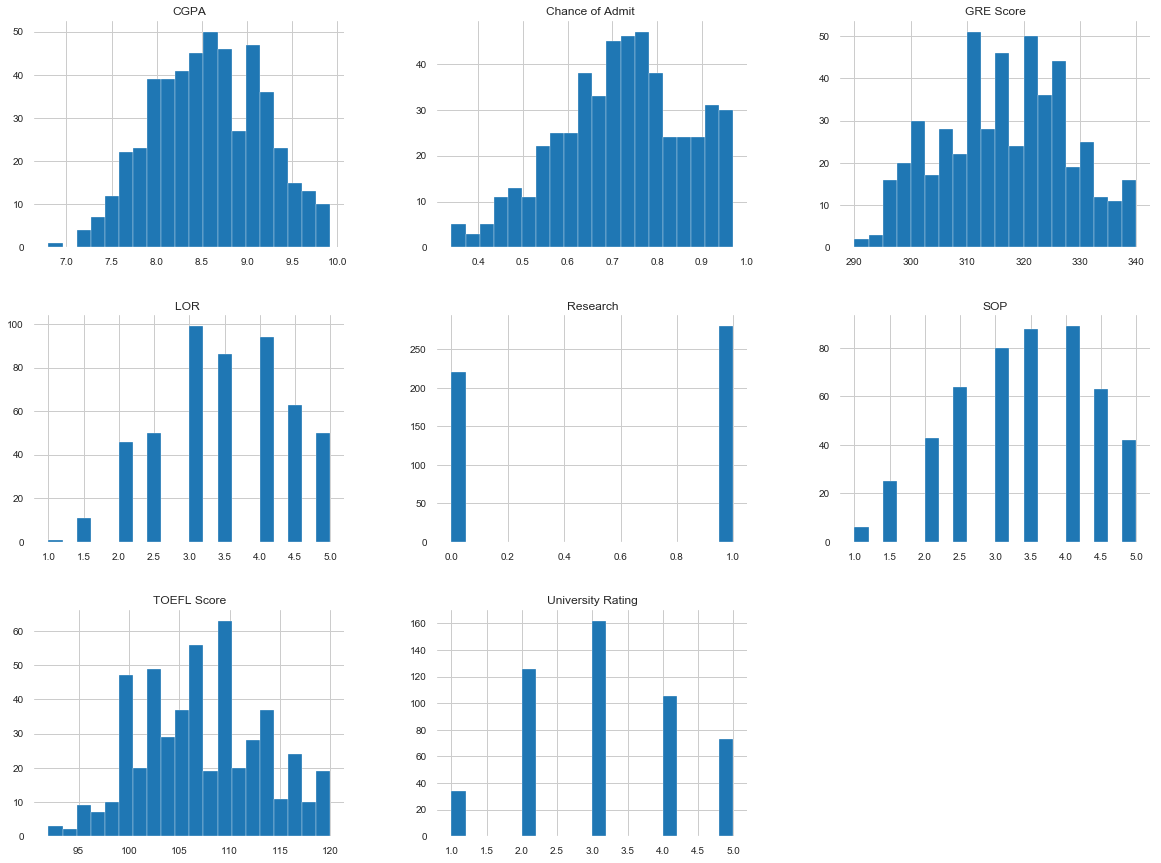

In [16]:
# Data distribution
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=20, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

### Lets check out those with top Probability of getting Admitted

In [19]:
top_prob = dataset[(dataset['Gre_Score']>=330) & (dataset['TOEFL_Score']>=115) & \
                   (dataset['CGPA']>=9.5)].sort_values(by=['Chance_of_Admit'],ascending=False)
top_prob

Gre_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  Research  \
202        340          120                  5  4.5  4.5  9.91         1   
143        340          120                  4  4.5  4.0  9.92         1   
24         336          119                  5  4.0  3.5  9.80         1   
203        334          120                  5  4.0  5.0  9.87         1   
213        333          119                  5  5.0  4.5  9.78         1   
385        335          117                  5  5.0  5.0  9.82         1   
148        339          116                  4  4.0  3.5  9.80         1   
81         340          120                  4  5.0  5.0  9.50         1   
496        337          117                  5  5.0  5.0  9.87         1   
23         334          119                  5  5.0  4.5  9.70         1   
212        338          120                  4  5.0  5.0  9.66         1   
399        333          117                  4  5.0  4.0  9.66         1   
372        336          119                  4  4.5  4.0  9.62         1   
120        335          117                  5  5.0  5.0  9.56         1   
70         332          118                  5  5.0  5.0  9.64         1   
193        336          118                  5  4.5  5.0  9.53         1   
25         340          120                  5  4.5  4.5  9.60         1   
423        334          119                  5  4.5  5.0  9.54         1   
497        330          120                  5  4.5  5.0  9.56         1   
361        334          116                  4  4.0  3.5  9.54         1   
253        335          115                  4  4.5  4.5  9.68         1   
0          337          118                  4  4.5  4.5  9.65         1   
47         339          119                  5  4.5  4.0  9.70         0   

     Chance_of_Admit  
202             0.97  
143             0.97  
24              0.97  
203             0.97  
213             0.96  
385             0.96  
148             0.96  
81              0.96  
496             0.96  
23              0.95  
212             0.95  
399             0.95  
372             0.95  
120             0.94  
70              0.94  
193             0.94  
25              0.94  
423             0.94  
497             0.93  
361             0.93  
253             0.93  
0               0.92  
47              0.89

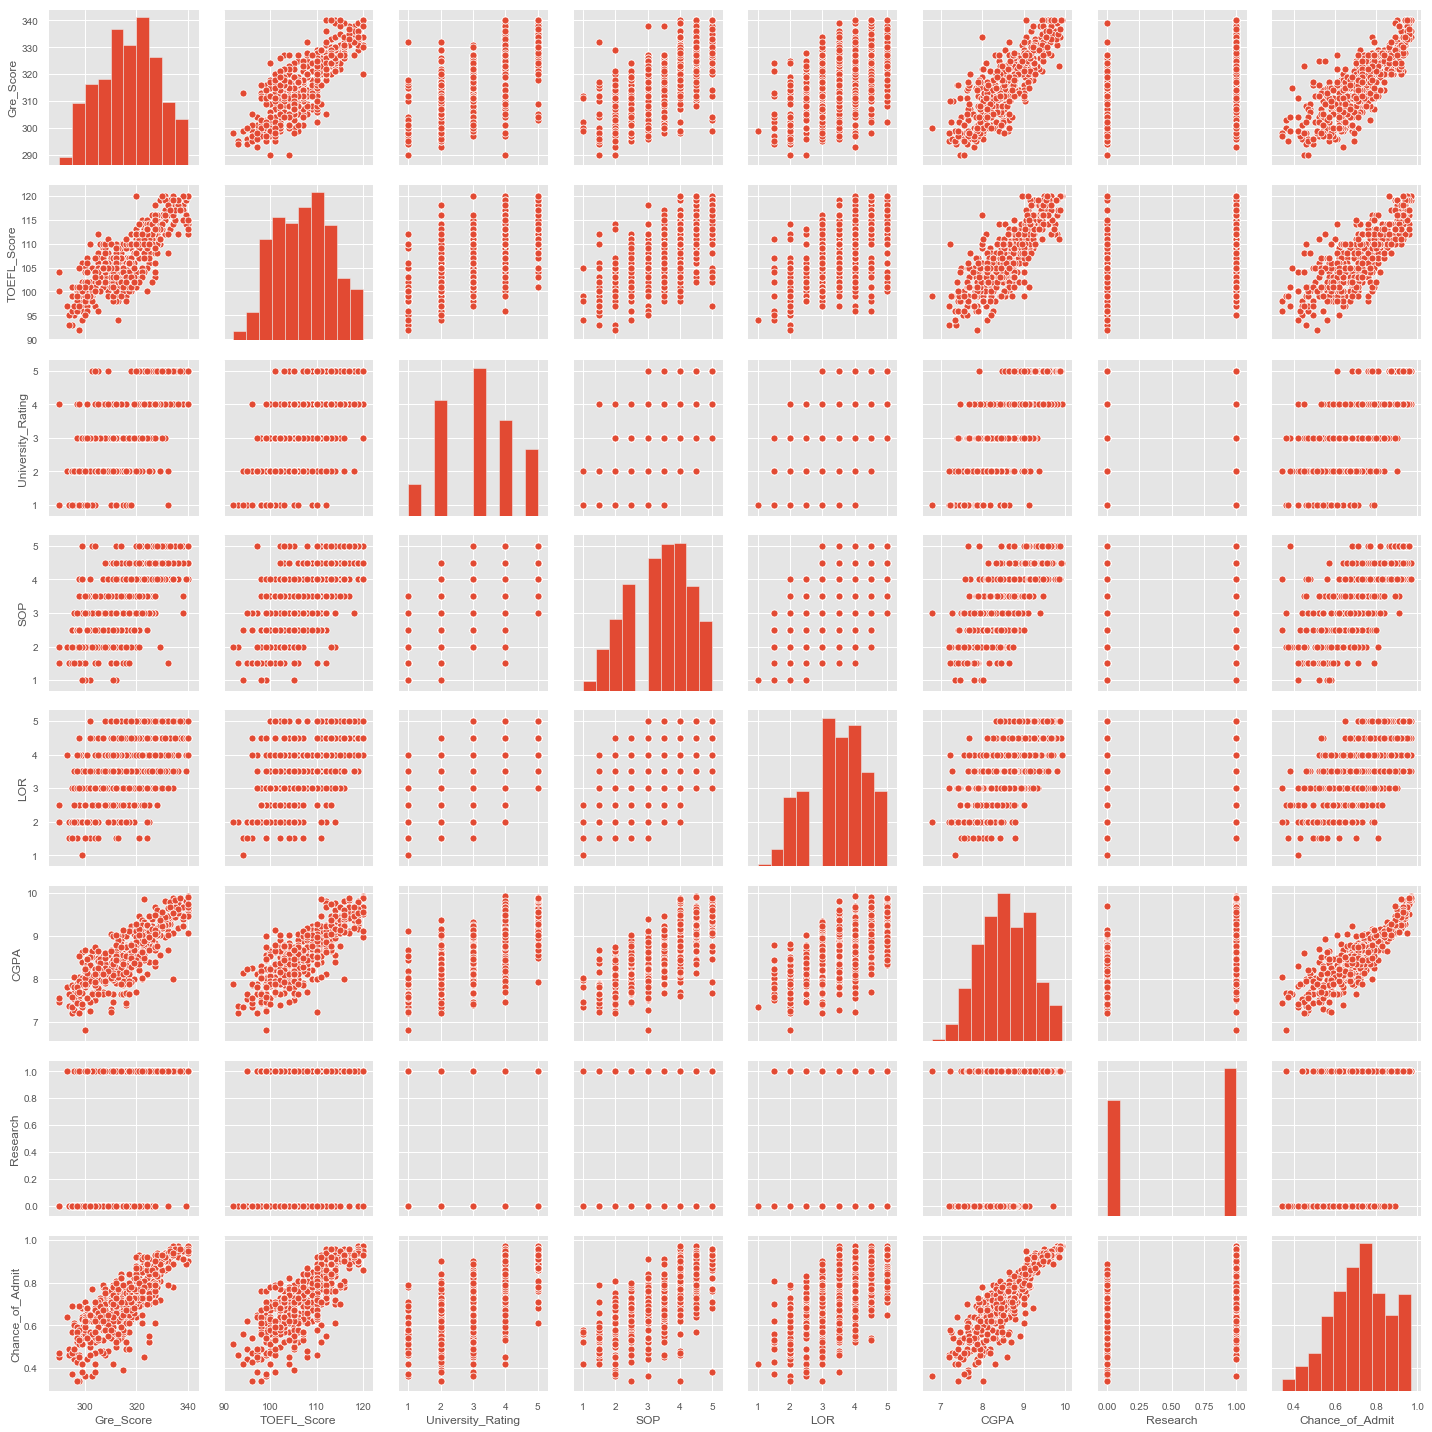

In [20]:
# plotting a pair plot to see the correlations

plt.rcParams['figure.figsize'] = (20,21)
plt.style.use('ggplot')

sns.pairplot(dataset, palette="crest")
# sns.color_palette("flare", as_cmap=True)
plt.show()

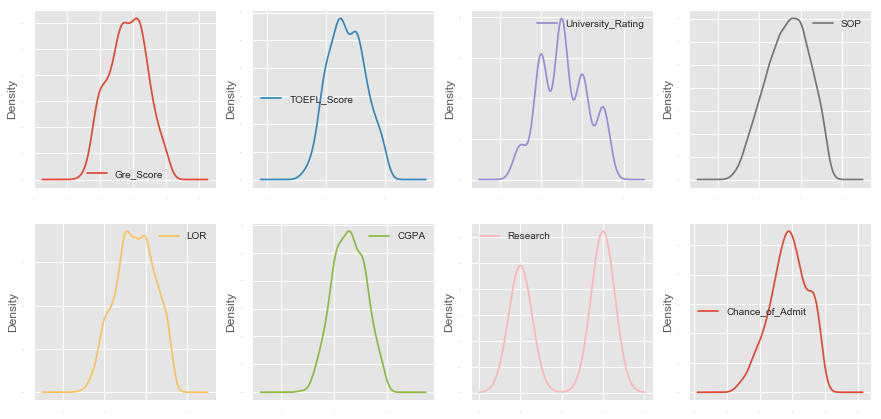

In [21]:
# density plot
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, fontsize=1, figsize=(15,15))
plt.show()

### Check for Outliers in the Temperature Features

Interval of values not considered Outliers

- [Q1 – 1.5 (IQR) , Q3 + 1.5 (IQR) ] (i.e. IQR = Q3 - Q1)

- Values not lying within this interval are considered outliers. Knowing the values of Q1 and Q3 is fundamental for this calculation to take place.


### Methods for removing Outliers

- `Remove the outliers:` This is only possible when the proportion of outliers to meaningful values is quite low, and the data values are not on a time series scale. If the proportion of outliers is high, then removing these values will hurt the richness of data, and models applied won’t be able to capture the true essence that lies within. However, in case the data is of a time series nature, removing outliers from the data won’t be feasible, the reason being that for a time series model to train effectively, data should be continuous with respect to time. Removing outliers in this case will introduce breaks within the continuous distribution.

- `Replace outliers with means:` Another way to approach this is by taking the mean of values lying with the interval. calculate the mean, and use these to replace the outliers. This will successfully transform the outliers in line with the valid observations; however, this will remove the anomalies that were otherwise present in the dataset, and their findings could present interesting insights.

- `Transform the outlier values:` Another way to cop up with outliers is to limit them to the upper and lower boundaries of acceptable data. The upper boundary can be calculated by plugging in the values of Q3 and IQR into Q3 + 1.5IQR and the lower boundary can be calculated by plugging in the values of Q1 and IQR into Q1 – 1.5IQR.

- `Variable transformation:` Transformations are used to convert the inherited distribution into a normal distribution. Outliers bring non-normality to the data and thus transforming the variable can reduce the influence of outliers. Methodologies of transformation include, but are not limited to, natural log, conversion of data into ratio variables, and so on.

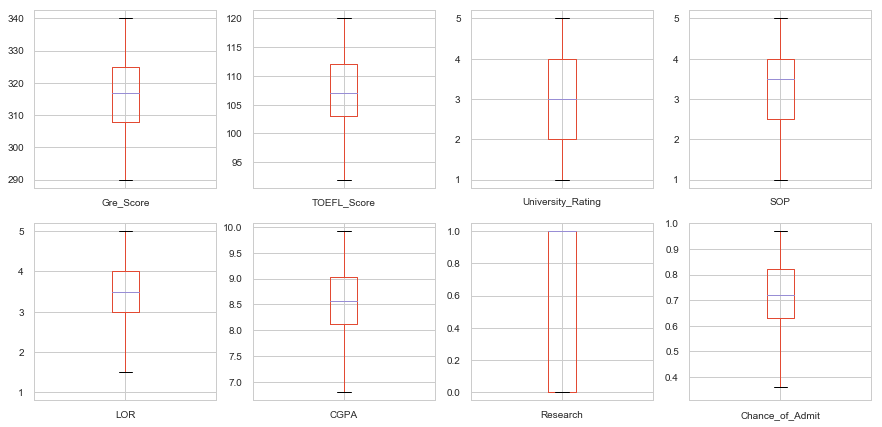

In [22]:
# box and whisker plots
sns.set_style("whitegrid")
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15, 15))
plt.show()

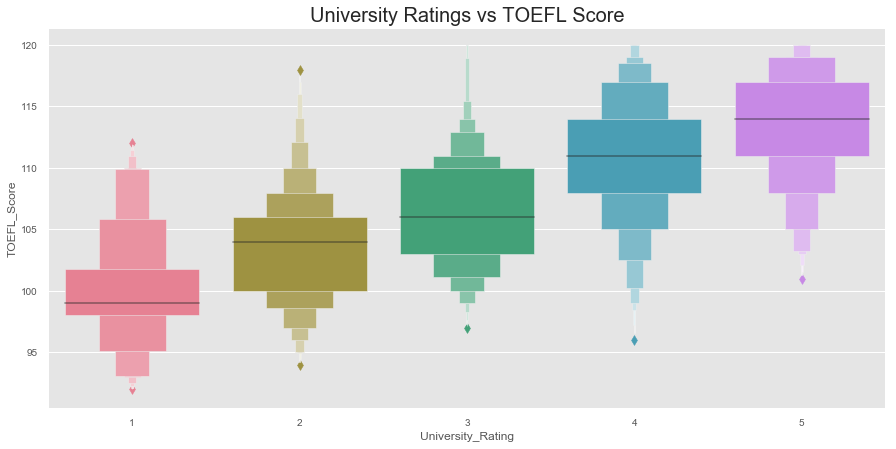

In [23]:
# University Ratings vs TOEFL Score
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('ggplot')

sns.boxenplot(dataset['University_Rating'], dataset['TOEFL_Score'], palette='husl')
plt.title('University Ratings vs TOEFL Score', fontsize = 20)
plt.show()

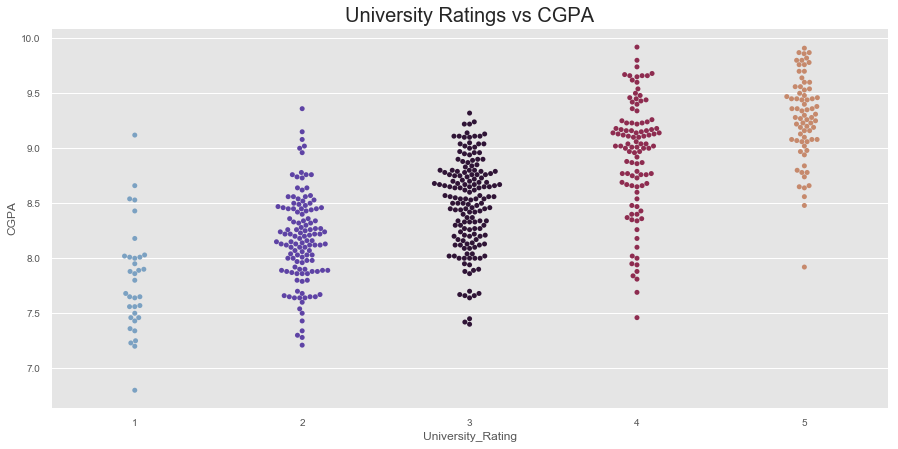

In [24]:
# University Rating vs CGPA
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('ggplot')

sns.swarmplot(dataset['University_Rating'], dataset['CGPA'], palette='twilight')
plt.title('University Ratings vs CGPA', fontsize = 20)
plt.show()

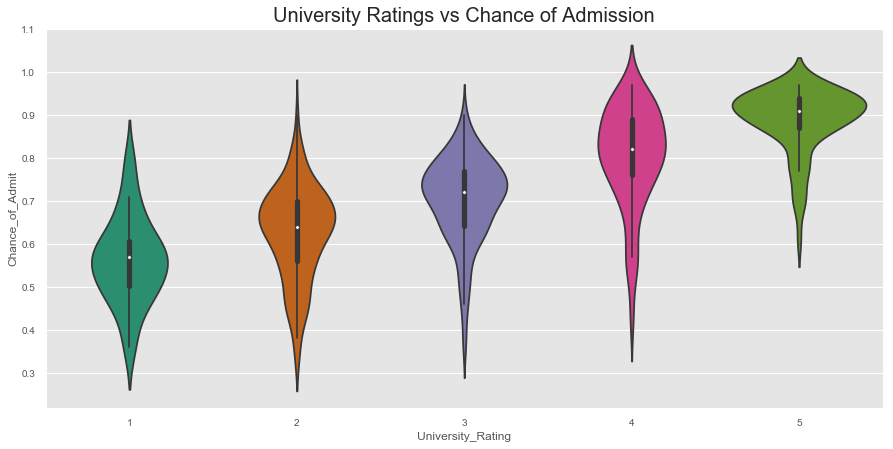

In [25]:
# University Ratings vs Chance of Admission
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('ggplot')

sns.violinplot(dataset['University_Rating'], dataset['Chance_of_Admit'], palette="Dark2")
plt.title('University Ratings vs Chance of Admission', fontsize = 20)
plt.show()

#### A graphical Understanding of the relation between different factors responsible for graduate admissions

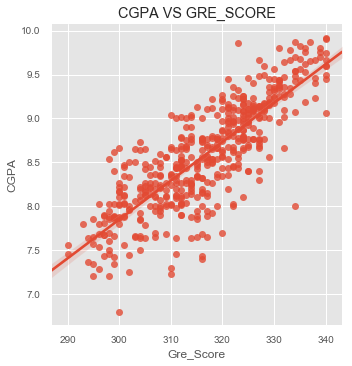

In [26]:
fig=sns.lmplot(x='Gre_Score',y='CGPA',data=dataset)
plt.title("CGPA VS GRE_SCORE")
plt.show()

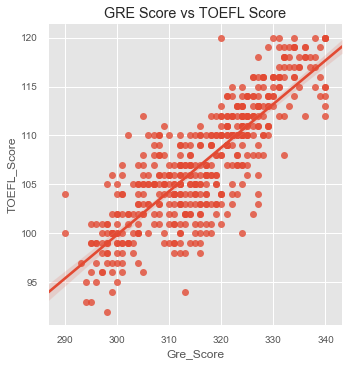

In [27]:
fig = sns.lmplot(x="Gre_Score", y="TOEFL_Score", data=dataset)
plt.title("GRE Score vs TOEFL Score")
plt.show()

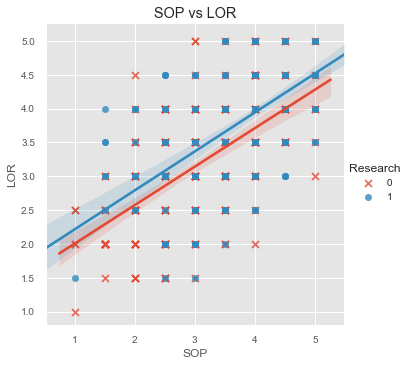

In [28]:
fig = sns.lmplot(x="SOP", y="LOR", data=dataset, hue="Research", markers=["x", "o"])
plt.title("SOP vs LOR")
plt.show()

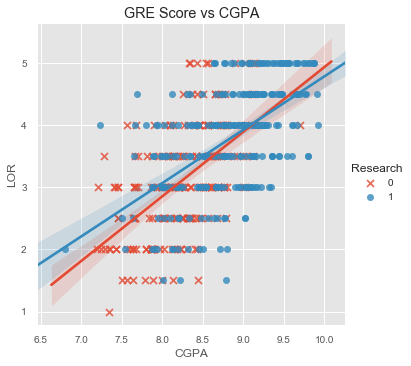

In [29]:
fig = sns.lmplot(x="CGPA", y="LOR", data=dataset, hue="Research", markers=["x", "o"])
plt.title("GRE Score vs CGPA")
plt.show()

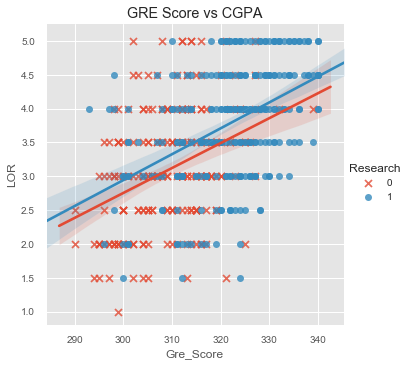

In [30]:
fig = sns.lmplot(x="Gre_Score", y="LOR", data=dataset, hue="Research", markers=["x", "o"])
plt.title("GRE Score vs CGPA")
plt.show()

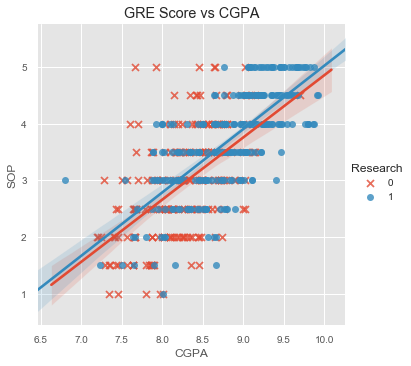

In [31]:
fig = sns.lmplot(x="CGPA", y="SOP", data=dataset, hue='Research', markers=["x", "o"])
plt.title("GRE Score vs CGPA")
plt.show()

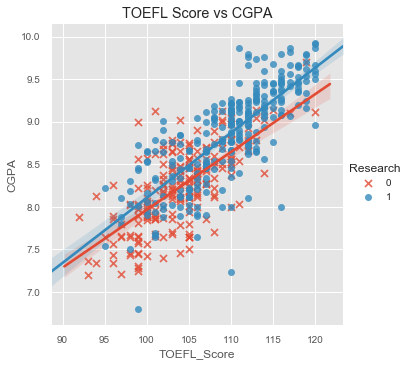

In [32]:
fig = sns.lmplot(x="TOEFL_Score", y="CGPA", data=dataset, hue='Research', markers=["x", "o"])
plt.title("TOEFL Score vs CGPA")
plt.show()

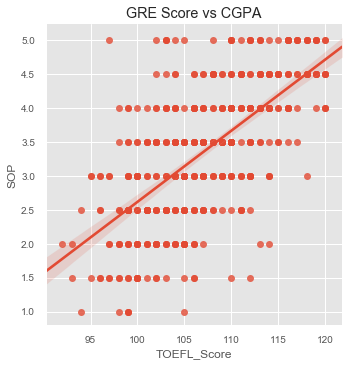

In [33]:
fig = sns.lmplot(x="TOEFL_Score", y="SOP", data=dataset)
plt.title("GRE Score vs CGPA")
plt.show()

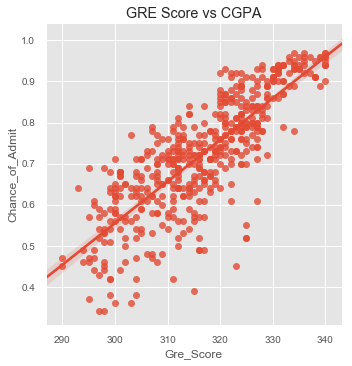

In [34]:
fig = sns.lmplot(x="Gre_Score", y="Chance_of_Admit", data=dataset)
plt.title("GRE Score vs CGPA")
plt.show()

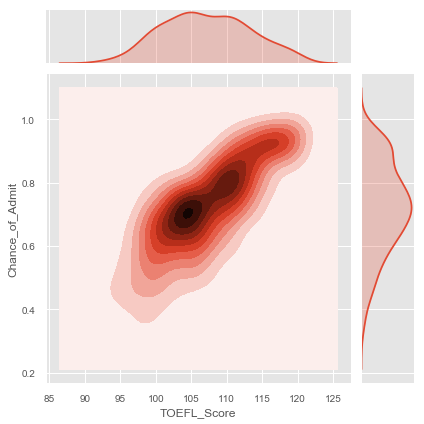

In [35]:
fig=sns.jointplot(x='TOEFL_Score',y='Chance_of_Admit',data=dataset,kind='kde')
plt.show()

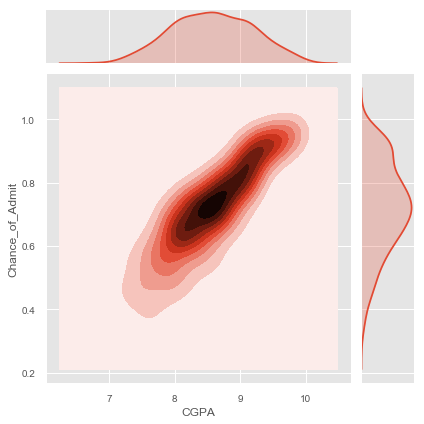

In [36]:
fig=sns.jointplot(x='CGPA',y='Chance_of_Admit',data=dataset,kind='kde')
plt.show()

#### Check for Multicollinearity

- `Colinearity` is the state where `two variables` are `highly correlated` and contain `similiar information` about the `variance` within a given dataset. To detect `colinearity` among variables, simply create a `correlation matrix` and find variables with large absolute values. 


- `Multicollinearity` occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. 

In [37]:
dataset.corr()

Gre_Score  TOEFL_Score  University_Rating       SOP  \
Gre_Score           1.000000     0.827200           0.635376  0.613498   
TOEFL_Score         0.827200     1.000000           0.649799  0.644410   
University_Rating   0.635376     0.649799           1.000000  0.728024   
SOP                 0.613498     0.644410           0.728024  1.000000   
LOR                 0.524679     0.541563           0.608651  0.663707   
CGPA                0.825878     0.810574           0.705254  0.712154   
Research            0.563398     0.467012           0.427047  0.408116   
Chance_of_Admit     0.810351     0.792228           0.690132  0.684137   

                        LOR      CGPA  Research  Chance_of_Admit  
Gre_Score          0.524679  0.825878  0.563398         0.810351  
TOEFL_Score        0.541563  0.810574  0.467012         0.792228  
University_Rating  0.608651  0.705254  0.427047         0.690132  
SOP                0.663707  0.712154  0.408116         0.684137  
LOR                1.000000  0.637469  0.372526         0.645365  
CGPA               0.637469  1.000000  0.501311         0.882413  
Research           0.372526  0.501311  1.000000         0.545871  
Chance_of_Admit    0.645365  0.882413  0.545871         1.000000

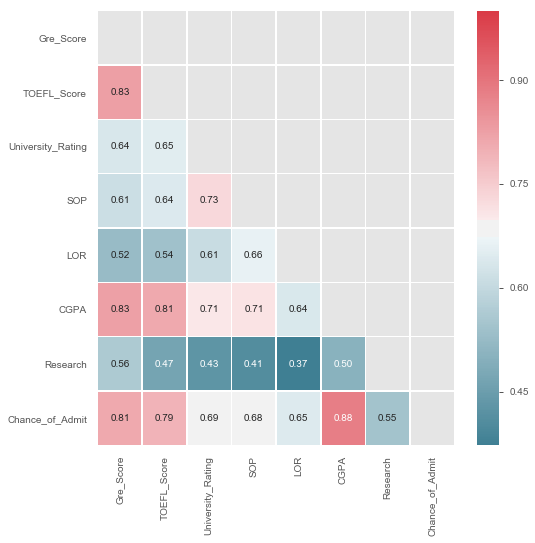

In [38]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

#### Detecting Multicollinearity using VIF

- `Multicollinearity` can be detected via various methods. The main focus here is `VIF (Variable Inflation Factors)`. 

- `VIF` determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

or

`VIF` score of an independent variable represents how well the variable is explained by other independent variables.


`R^2` value is determined to find out how well an independent variable is described by the other independent variables. A high value of `R^2` means that the variable is highly correlated with the other variables. This is captured by the `VIF` which is denoted below:


<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/multicollinearity_VIF.png"></a>


So, the closer the `R^2` value to 1, the higher the value of `VIF` and the higher the multicollinearity with the particular independent variable.

In [39]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [40]:
X = dataset.iloc[:,:-1]
calc_vif(X)

variables          VIF
0          Gre_Score  1308.061089
1        TOEFL_Score  1215.951898
2  University_Rating    20.933361
3                SOP    35.265006
4                LOR    30.911476
5               CGPA   950.817985
6           Research     2.869493

- `VIF` starts at 1 and has no upper limit
- `VIF = 1`, no correlation between the independent variable and the other variables
- `VIF` exceeding `10` or `20` indicates high multicollinearity between this independent variable and the others

We can see here that the `‘Gre_Score’`, `‘TOEFL Score’`, and `'CGPA'` have a `high VIF` value, meaning they can be predicted by other `independent variables` in the dataset. 

- Although `correlation matrix` and `scatter plots` can also be used to find `multicollinearity`, their findings only show the `bivariate relationship` between the `independent variables`. `VIF` is preferred as it can show the correlation of a variable with a group of other variables.

#### Fixing Multicollinearity

Dropping two of the `correlated features` will help in bringing down the `multicollinearity` between correlated features:

- Dropping:

    - `Gre_Score`
    - `TOEFL Score`

In [42]:
X = dataset.drop(['Gre_Score','TOEFL_Score', 'Chance_of_Admit'],axis=1)
calc_vif(X)

variables        VIF
0  University_Rating  19.777410
1                SOP  33.625178
2                LOR  30.356252
3               CGPA  25.101796
4           Research   2.842227

Still dropping either of the `SOP` or `LOR` features to help bring down `multicollinearity` between correlated features:

In [43]:
X = dataset.drop(['SOP','Gre_Score','TOEFL_Score', 'Chance_of_Admit'],axis=1)
calc_vif(X)

variables        VIF
0  University_Rating  15.140770
1                LOR  26.918495
2               CGPA  22.369655
3           Research   2.819171

We were able to drop the variable `‘Gre_Score’`, `'TOEFL_Score'` from the dataset because its information was being captured by the `‘CGPA’` variable, and as well drop the `'SOP'` variable because its information was captured by the `'LOR'` variable. This has reduced the redundancy in our dataset.

- Dropping variables should be an `iterative process` starting with the variable having the `largest VIF` value because its trend is `highly captured` by other variables. If you do this, you will notice that `VIF` values for other variables would have reduced too, although to a varying extent.


- After dropping the `‘Gre_Score’`, `'TOEFL_Score'` and `'SOP'` variable, `VIF` values for all the variables have decreased to a varying extent.

In [44]:
dataset = dataset.drop(['SOP', 'Gre_Score', 'TOEFL_Score'], axis=1)
dataset.head()

University_Rating  LOR  CGPA  Research  Chance_of_Admit
0                  4  4.5  9.65         1             0.92
1                  4  4.5  8.87         1             0.76
2                  3  3.5  8.00         1             0.72
3                  3  2.5  8.67         1             0.80
4                  2  3.0  8.21         0             0.65

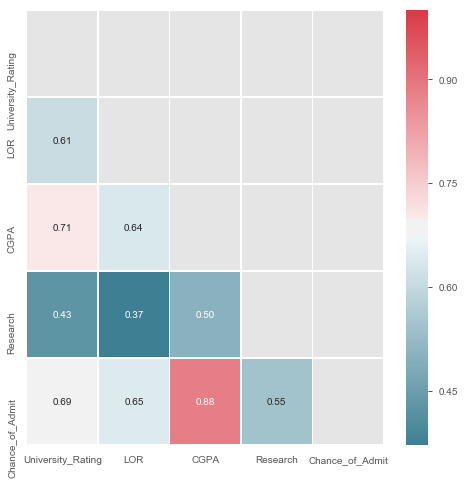

In [45]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

#### Compare the distribution of the Features to see if there is any need for `Normalization` or `Scaling`. 

`Normal distribution:` Also known as the `"bell curve"`, this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The `normal distribution` is also known as the `Gaussian distribution`.

Text(0.5, 1.0, 'Chance_of_Admit')

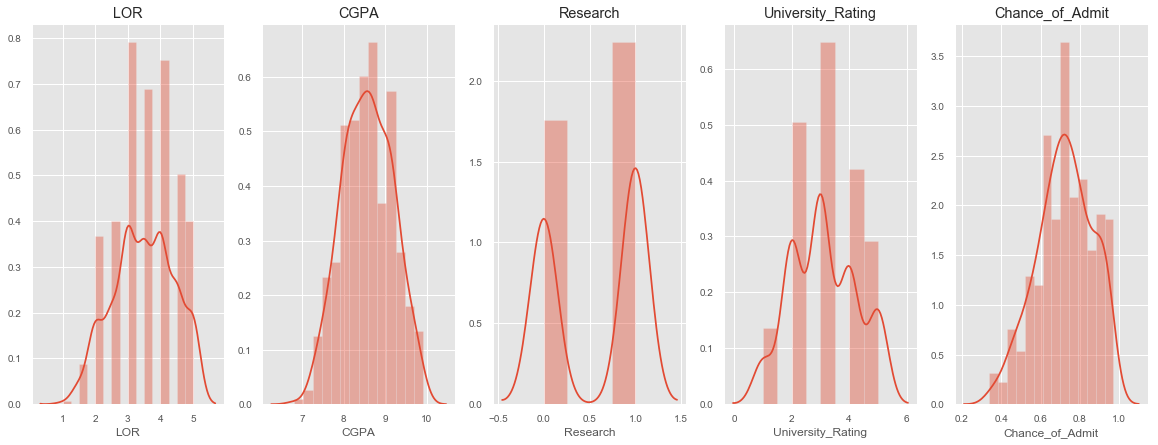

In [46]:
# plot both together to compare
fig, axs = plt.subplots(ncols=5, figsize=(20, 7))

sns.distplot(dataset['LOR'], ax=axs[0])
axs[0].set_title("LOR")

sns.distplot(dataset['CGPA'], ax=axs[1])
axs[1].set_title("CGPA")

sns.distplot(dataset['Research'], ax=axs[2])
axs[2].set_title("Research")

sns.distplot(dataset['University_Rating'], ax=axs[3])
axs[3].set_title("University_Rating")

sns.distplot(dataset['Chance_of_Admit'], ax=axs[4])
axs[4].set_title("Chance_of_Admit")

`Normalization` is a technique often applied as part of data preparation for machine learning. `Normalization` avoids these problems by creating new values that maintain the `general distribution` and `ratios` in the source data, while keeping values within a scale applied across all numeric columns used in the model. Here, our Features seems to be normally distributed, so no need to normalise the Features. Scale is `(-0.5, 10)`.